In [1]:
import pandas as pd
import numpy as np

Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).

In [2]:
df = pd.read_csv("sales_data_with_discounts.csv")
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


Identify numerical columns in the dataset.

In [15]:
numerical_cols = df.select_dtypes(include=['number']).columns.to_list()
numerical_cols

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

Calculate the mean, median, mode, and standard deviation for these columns.

In [4]:
# Compute descriptive statistics
desc_stats = df[numerical_cols].agg(['mean', 'median', 'std']).T
desc_stats['mode'] = df[numerical_cols].mode().iloc[0]
desc_stats

,mean,median,std,mode
Volume,5.066667,4.000000,4.231602,3.000000
Avg Price,10453.433333,1450.000000,18079.904840,400.000000
Total Sales Value,33812.835556,5700.000000,50535.074173,24300.000000
Discount Rate (%),15.155242,16.577766,4.220602,5.007822
Discount Amount,3346.499424,988.933733,4509.902963,69.177942
Net Sales Value,30466.336131,4677.788059,46358.656624,326.974801


Provide a brief interpretation of these statistics.

In [5]:
# Median
df.median(numeric_only=True)

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

Provide a brief interpretation of these statistics.

### Interpretation:
- **Mean**: Shows the average sales, discount, or price across all records.  
- **Median**: Helps identify the central tendency while being less sensitive to outliers.  
- **Mode**: Shows the most frequent value in each column.  
- **Standard Deviation**: Indicates how much the values deviate from the mean (higher = more spread).  


In [6]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


# Data Visualization

In [7]:
import matplotlib.pyplot as plt

Plot histograms for each numerical column.

Histogram

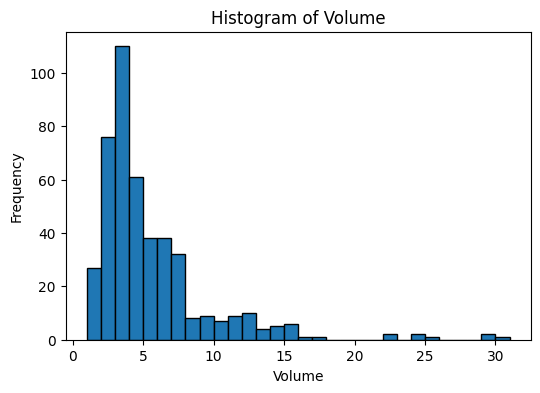

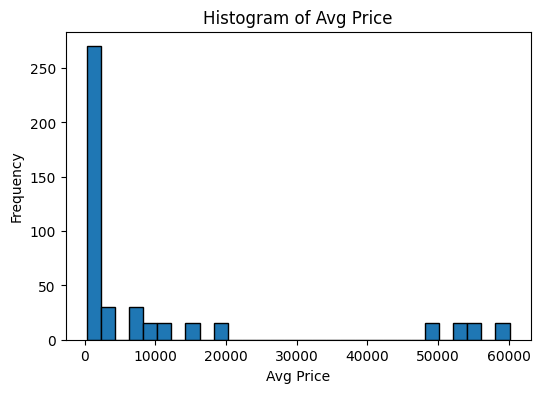

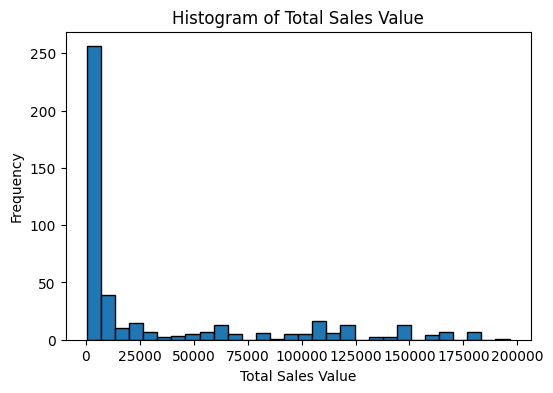

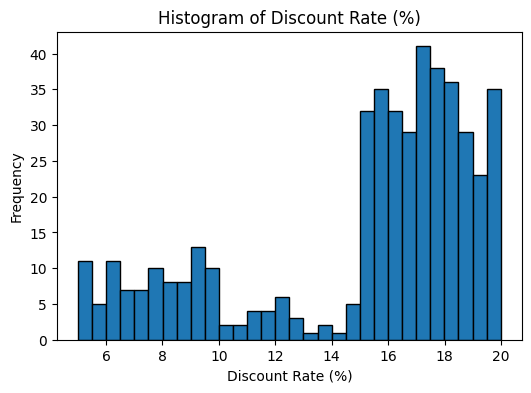

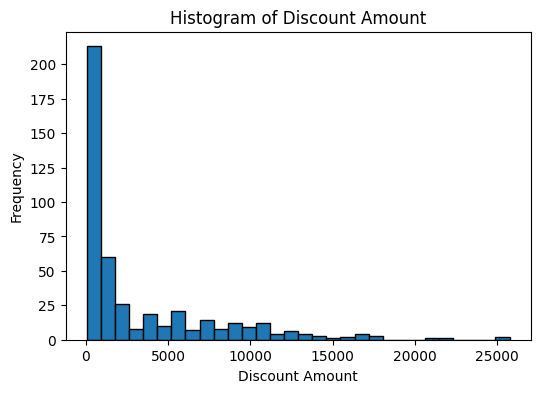

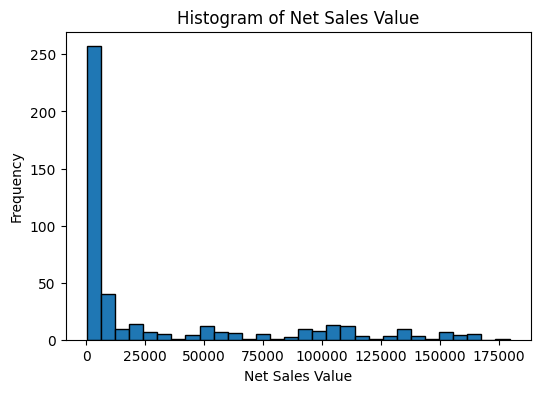

In [8]:
# Histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30, edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


### Interpretation:
- Histograms show the **distribution** of numerical values.  
- Skewness and outliers can be observed (e.g., sales values may be right-skewed due to high-value purchases).  


BoxPlot

Create boxplots for numerical variables to identify outliers and the interquartile range.

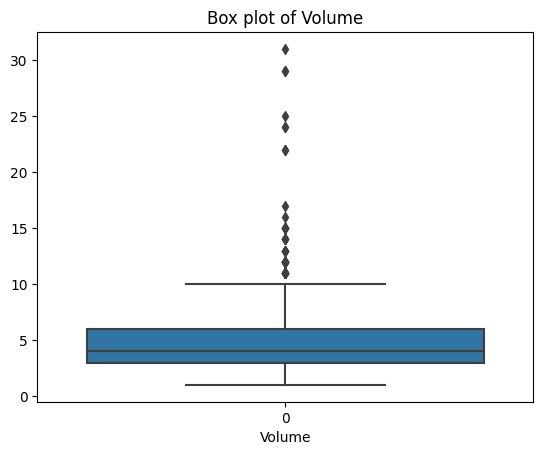

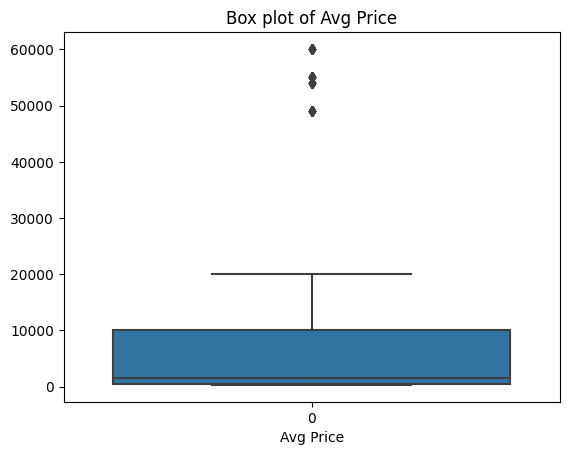

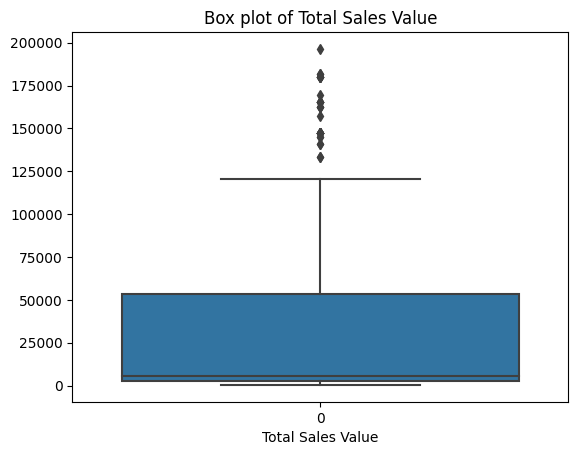

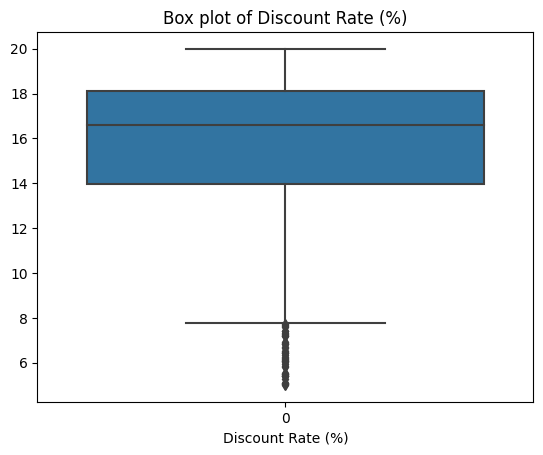

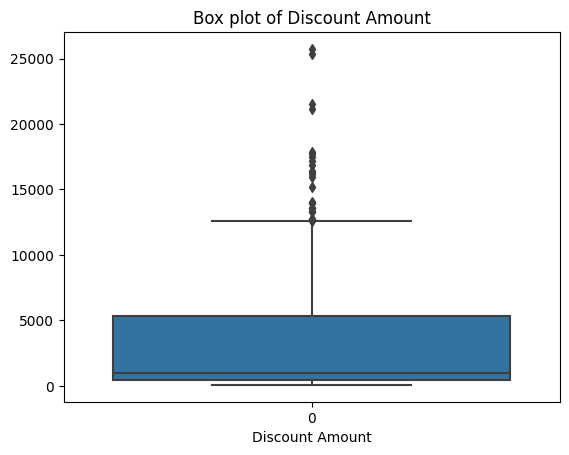

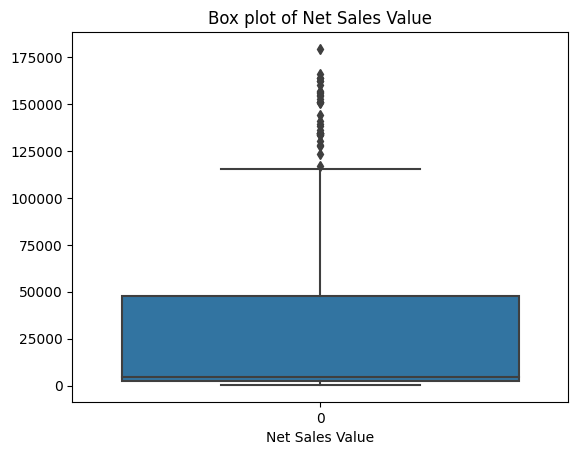

In [9]:
import seaborn as sns
# Box plot for all the columns

for col in numerical_cols:

    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.title(f'Box plot of {col}')
    plt.show()
    

### Interpretation:
- Boxplots help detect **outliers**.  
- Values beyond the whiskers indicate unusual or extreme data points.  

●	Bar Chart Analysis for Categorical Column:


	Identify categorical columns in the dataset.

In [10]:
categorical_cols = df.select_dtypes(include=['object'])
list(categorical_cols)

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

	Create bar charts to visualize the frequency or count of each category.

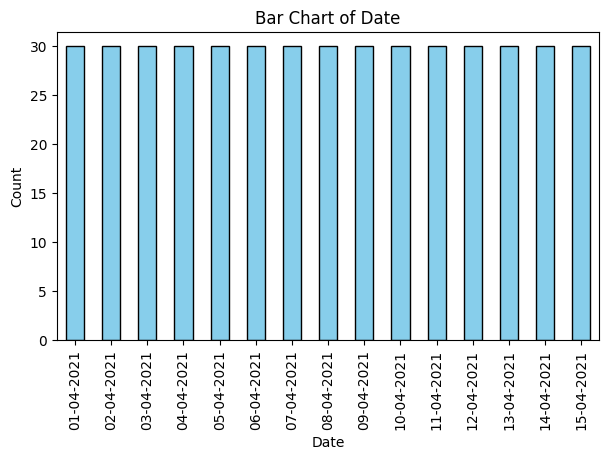

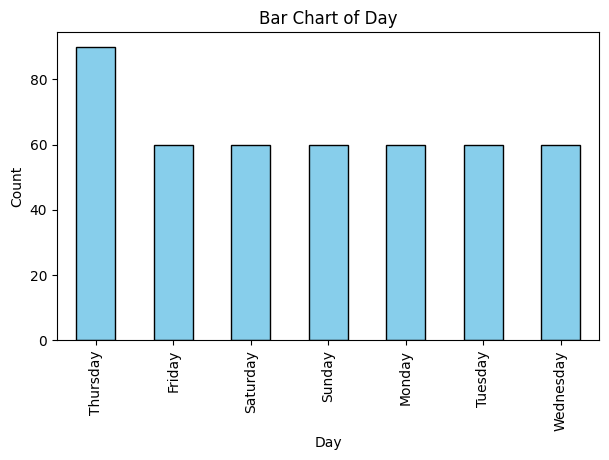

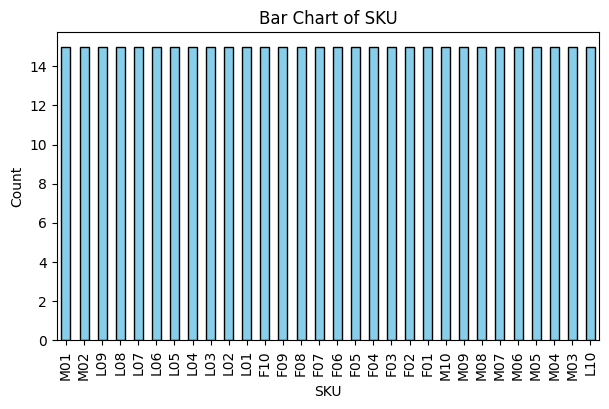

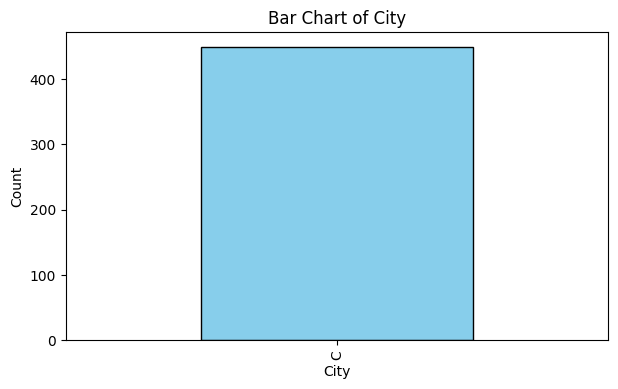

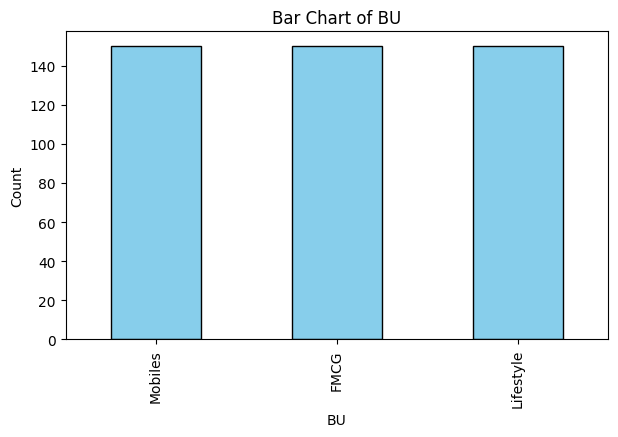

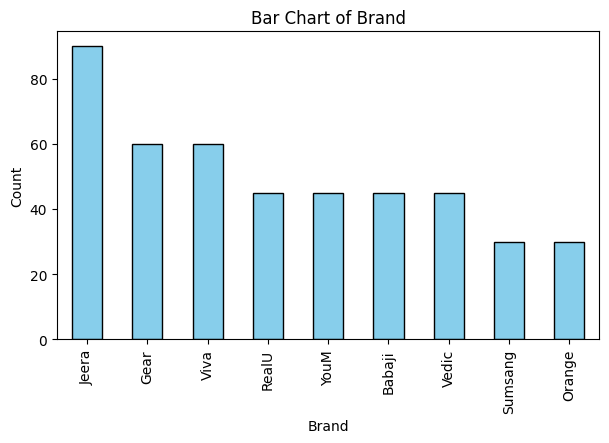

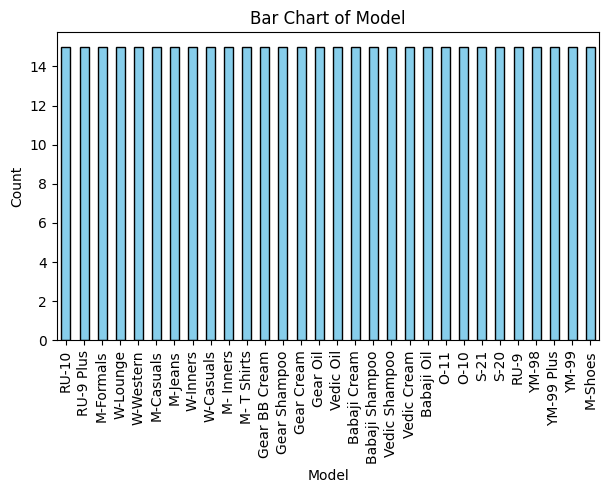

In [11]:
# Bar chart for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(7,4))
    df[col].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### Interpretation:
- Bar charts show the **frequency distribution of categories** (e.g., brands, cities, days of the week).  
- This helps identify the most popular products or time periods.  


# Standardization of Numerical Variables

## Standardization of Numerical Variables
Objective: To scale numerical variables for uniformity, improving suitability for ML models.

**Standardization (Z-score normalization):**

z = (x - mu)/sigma 

- Mean = 0  
- Standard Deviation = 1  


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized = scaler.fit_transform(df[numerical_cols])

standardized_df = pd.DataFrame(standardized, columns=numerical_cols)

# Compare before and after standardization for first few rows
print("Before Standardization:\n", df[numerical_cols].head())
print("\nAfter Standardization:\n", standardized_df.head())


Before Standardization:
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  

After Standardization:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146   

# Conversion of Categorical Data into Dummy Variables

## Conversion of Categorical Data into Dummy Variables
Objective: To transform categorical variables into numerical format using **One-Hot Encoding**.

Why?
- ML models cannot directly use text categories.  
- Dummy variables create **binary columns (0/1)** for each category.  


In [13]:
df_new = pd.get_dummies(df,columns=numerical_cols,drop_first=True,dtype='int')
df_new

,Date,Day,SKU,City,BU,Brand,Model,Volume_2,Volume_3,Volume_4,...,Net Sales Value_155761.9778062413,Net Sales Value_156330.96988962853,Net Sales Value_156895.96877157467,Net Sales Value_160346.50118040683,Net Sales Value_162399.01626686862,Net Sales Value_162603.18637944586,Net Sales Value_163915.971,Net Sales Value_163967.08007046414,Net Sales Value_166263.16134784388,Net Sales Value_179507.47904902254
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals,1,0,0,...,0,0,0,0,0,0,0,0,0,0
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge,1,0,0,...,0,0,0,0,0,0,0,0,0,0
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Conclusion
- Descriptive analytics revealed useful **summary statistics** for sales, discounts, and pricing.  
- Visualizations (histograms, boxplots, bar charts) helped detect **distributions, outliers, and category patterns**.  
- Standardization ensured numerical variables were on a **common scale**, important for ML algorithms.  
- One-Hot Encoding transformed categorical data into a machine-readable format.  

Together, these preprocessing steps make the dataset ready for **predictive modeling and deeper analytics**.
